<a href="https://colab.research.google.com/github/yehuda-yu/Data_Science_Projects/blob/main/6_Diabetes_prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Data Sciecne (71253) - Problem Set 6


In this problem set we'll continue to work with the diabetes data set from the previous problem set. This time we will try and predict which people suffer from diabetes.

*** 

## 1. Regressing against indivdual variables

### 1.1 We'll again focus on the variables BMI, glucose, insulin, and Age.  
### Regress each individual variable against the variable 'outcome' (which indicates which patients have diabetes)
### What are the coefficients (a,b) or (intercept, slope) for each one of the fits?

### Import packages and read the file:

In [1]:
# Im working with Colab so i need to connect my drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from scipy.special import expit
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
palette = ["#333C83", "#F24A72", "#FDAF75", "#EAEA7F"]
sns.set_theme(style="white",palette=palette,font_scale = 1.5)

In [4]:
# import dataset
file = "/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/diabetes.csv"
df = pd.read_csv(file)
df = df[['BMI',"Glucose", "Insulin", "Age","Outcome"]] # new df with the columns
df

,BMI,Glucose,Insulin,Age,Outcome
0,33.6,148,0,50,1
1,26.6,85,0,31,0
2,23.3,183,0,32,1
3,28.1,89,94,21,0
4,43.1,137,168,33,1
...,...,...,...,...,...
763,32.9,101,180,63,0
764,36.8,122,0,27,0
765,26.2,121,112,30,0
766,30.1,126,0,47,1


In [7]:
# Define the fetures and label:
features = ['BMI',"Glucose", "Insulin", "Age"]
label = df["Outcome"]

In [8]:
df_results = pd.DataFrame(columns = ["Parameter","intercept","slope" ]) # df for results

# ____________ Logistic regression________________________
for column in features:
  df_reg = df[[column,"Outcome"]].dropna()
  df_reg = df_reg[df_reg!="nan"] #delete nan values that not deleted
  df_reg = df_reg[df_reg[column]!=0]#delete zeros
  x =df_reg[column].values
  y = df_reg["Outcome"].values
  x =df_reg[column].values.reshape(-1,1) #reshape for input to the model
  
  
  model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
  intercept = model.intercept_
  coef = model.coef_
  # append the results to df:
  new_row = {'Parameter':column, 'intercept':intercept,"slope":coef}
  #append row to the dataframe:
  df_results = df_results.append(new_row, ignore_index=True)
df_results

,Parameter,intercept,slope
0,BMI,[-3.3981082295457847],[[0.0851916305926703]]
1,Glucose,[-4.86166111131178],[[0.03417912513976894]]
2,Insulin,[-1.5623531966295559],[[0.005425588751622833]]
3,Age,[-1.9377945282785123],[[0.03916524421339355]]


### 1.2 Compute a p-value of each of the coefficients for each of the variables.  
### Based on your results, which variable(s) are indeed predictive of diabetes?   

In [9]:
for column in features:
  df_reg = df[[column,"Outcome"]].dropna()
  df_reg = df_reg[df_reg!="nan"] #delete nan values that not deleted
  df_reg = df_reg[df_reg[column]!=0]#delete zeros
  x =df_reg[column].values
  y = df_reg["Outcome"].values
  # model:
  X2 = sm.add_constant(x)
  est = sm.OLS(y, X2) 
  est2 = est.fit() #fit
  print(f"{column} slope p value = {est2.pvalues[1]}, intecept p value ={est2.pvalues[0]}")
  print(est2.pvalues[0]) #printing the p value
  # print(est2.summary())

BMI slope p value = 9.545638087577619e-19, intecept p value =1.0519268475309504e-05
1.0519268475309504e-05
Glucose slope p value = 2.4782891993107376e-48, intecept p value =1.3214198917802488e-20
1.3214198917802488e-20
Insulin slope p value = 7.754790500411411e-10, intecept p value =0.00015017014239413002
0.00015017014239413002
Age slope p value = 2.2099754606655082e-11, intecept p value =0.5821020968150739
0.5821020968150739


As we can see all the parameters are significant in 95% (alpha = 0.05) except of "Age". 

even if we take into account that we can get an eror because we have 4 parmeters still the results are significant:
$$ \alpha = \frac{0.05}{4} = 0.0125$$

Which means that Glucose, Insulin and BMI are predictive of diabetes (in different levels of accuracy).


### 1.3 Using your fits, predict which people have diabetes.  
### How accurate are the predictions based on each of the variables?

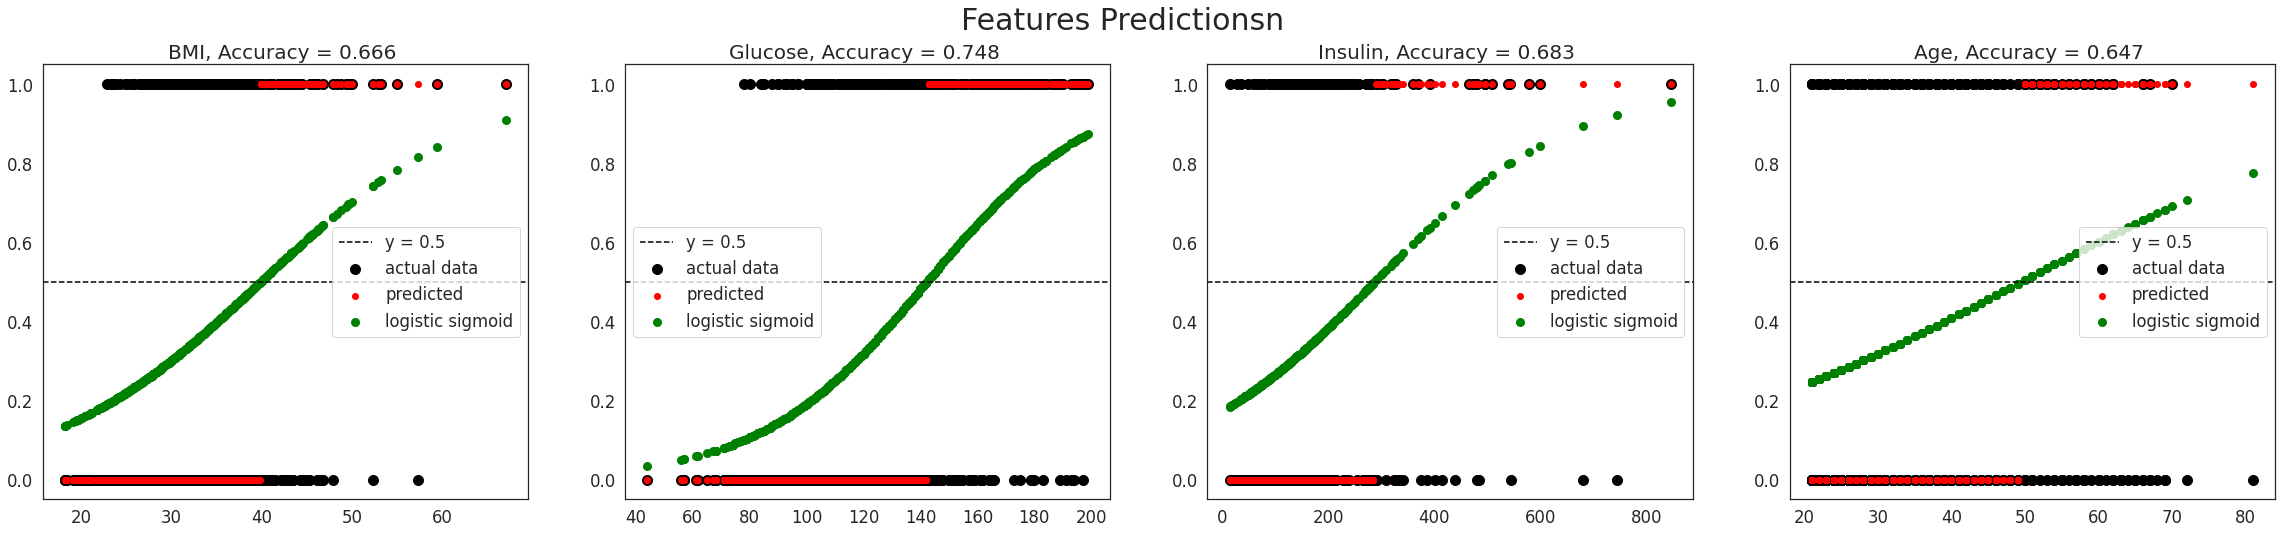

In [10]:
# graph borders:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(40,8))
dict_plot = {'BMI':ax1,"Glucose":ax2, "Insulin":ax3, "Age":ax4} #dictionary for axes
fig.suptitle('Features Predictionsn\n ',fontsize = 30)

# Data to graph and model:
for column in features:
  df_reg = df[[column,"Outcome"]].dropna()
  df_reg = df_reg[df_reg!="nan"] #delete nan values that not deleted
  df_reg = df_reg[df_reg[column]!=0]#delete zeros
  x =df_reg[column].values.reshape(-1,1)
  y = df_reg["Outcome"].values  
  model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
  # prediction:
  prediction = model.predict(x)
  # evaluate:
  accuracy = round(metrics.accuracy_score(y, prediction),3)

  # Graph:
  sigmoid = expit(x * model.coef_ + model.intercept_).ravel()
  dict_plot[column].scatter(x, y, 
            color='black', 
            s = 100, 
            label = "actual data")
  dict_plot[column].scatter(x, model.predict(x), 
            color='red', 
            label = "predicted")
  dict_plot[column].scatter(x, 
         sigmoid, 
         color='green', 
         linewidth=3, 
         label = 'logistic sigmoid') 
  dict_plot[column].axhline(y = 0.5, 
            color = 'black', 
            ls = '--', 
            label = 'y = 0.5')
  dict_plot[column].set_title(f"{column}, Accuracy = {accuracy} ",fontsize = 20)
  dict_plot[column].set_ylabel("")
  dict_plot[column].legend()

*** 

## 2. Regressing against multiple variables

### 2.1 Now perform a (multiple) logistic regression of diabetes jointly against all of the predictors considered in problem 1. 
### What are the coefficients (a,b1, b2,...) for each one of the fits?

In [11]:
features = df[['BMI',"Glucose", "Insulin", "Age"]].dropna()
features.replace([np.inf, -np.inf], np.nan, inplace=True)
label = df["Outcome"].dropna()

In [12]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(features,label)
predictions = model.predict(features)
# predictions
coefs = model.coef_
intercept = model.intercept_
print(f"b1,b2,b3,b4 = {coefs}")
print(f"a = {intercept}")

b1,b2,b3,b4 = [[ 0.05045743  0.02708069 -0.00058173  0.01862253]]
a = [-6.17680049]


Evaluate the model:

Text(0.5, 1.0, 'Confusion matrix:\n accuracy= 0.768 \n Precision= 0.727')

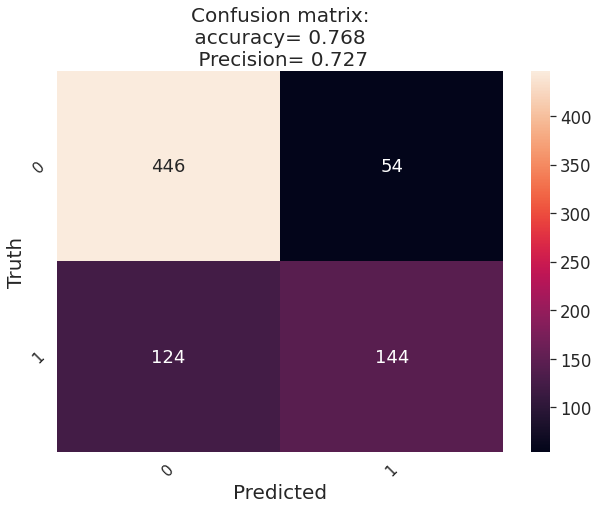

In [13]:
# labels to confiusion matrix:
unique_label = np.unique([label, predictions])

# df of confiusion matrix:
cmtx = pd.DataFrame(
    confusion_matrix(label, predictions, labels=unique_label), 
    index=[x for x in unique_label], 
    columns=[x for x in unique_label])
plt.figure(figsize = (10,7))
sns.heatmap(cmtx, annot=True, fmt='d')
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('Truth', fontsize = 20)
plt.xticks(fontsize =15,rotation=45)
plt.yticks(fontsize =15,rotation=45)
plt.title(f'Confusion matrix:\n accuracy= {round(metrics.accuracy_score(label, predictions ),3)} \n Precision= {round(metrics.precision_score(label, predictions ),3)}', fontsize = 20)

In [14]:
from sklearn.metrics import f1_score
f1 = f1_score(label, predictions, average=None)
df_score =pd.DataFrame(index = np.unique([label]))
df_score['F1_Score'] = f1
df_score

,F1_Score
0,0.833645
1,0.618026


### 2.2 Compare the slopes from the individual regression to the ones from the multiple regression. 
### Are the identical or different? Why? 

In [15]:
df_slopes = df_results[['Parameter',"slope"]]
df_slopes["slope_multiple_regression"] = coefs[0]
df_slopes["Different"] = np.abs(df_slopes["slope_multiple_regression"]-df_slopes["slope"])
df_slopes

,Parameter,slope,slope_multiple_regression,Different
0,BMI,[[0.0851916305926703]],0.050457,[[0.03473420057272119]]
1,Glucose,[[0.03417912513976894]],0.027081,[[0.0070984347955577]]
2,Insulin,[[0.005425588751622833]],-0.000582,[[0.0060073153016597745]]
3,Age,[[0.03916524421339355]],0.018623,[[0.020542719209676038]]


As we can see from the table above there is **small** different values of  slopes from the individual regression to the ones from the multiple regression for each of the parameters.

Usually, when the model learn from more parameters he can predict more well the results because we give him more information to learn from so he can adjust the parameters. 

 In this case, we can see that the main parameter that predict Diabetes is Glucose (Accuracy of 0.748 while the multiple regression have not much higher accuracy of 0.768) while the rest parameters have some correlation but not high (0.6-0.68 accuracy, while in this case 0.5 accuracy is equal to a guess because we have 2 options...).

 So, this is the reason that the slopes are different (the model is different because we have more parameters) but not so much different (most of the parameters not affect highly on the results...

### (BONUS) 2.3 Regularized regression:
- Repeat the multiple logistic regression, but using Lasso regression (l1 regularization) 
- Vary the strength of the regularization (parameter cost; using the parameter C in the LogisticRegression function of sklearn).
- How do the coefficiets depend on the strength of the penalty? Why?
- How does the goodness of the fit depend on the strength of the penalty? Why?


lets check what will be the results when we increase the value of C:

we will calculate the slopes and appent it to df. Then we will plot the results:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa29e7285d0>,
      dtype=object)

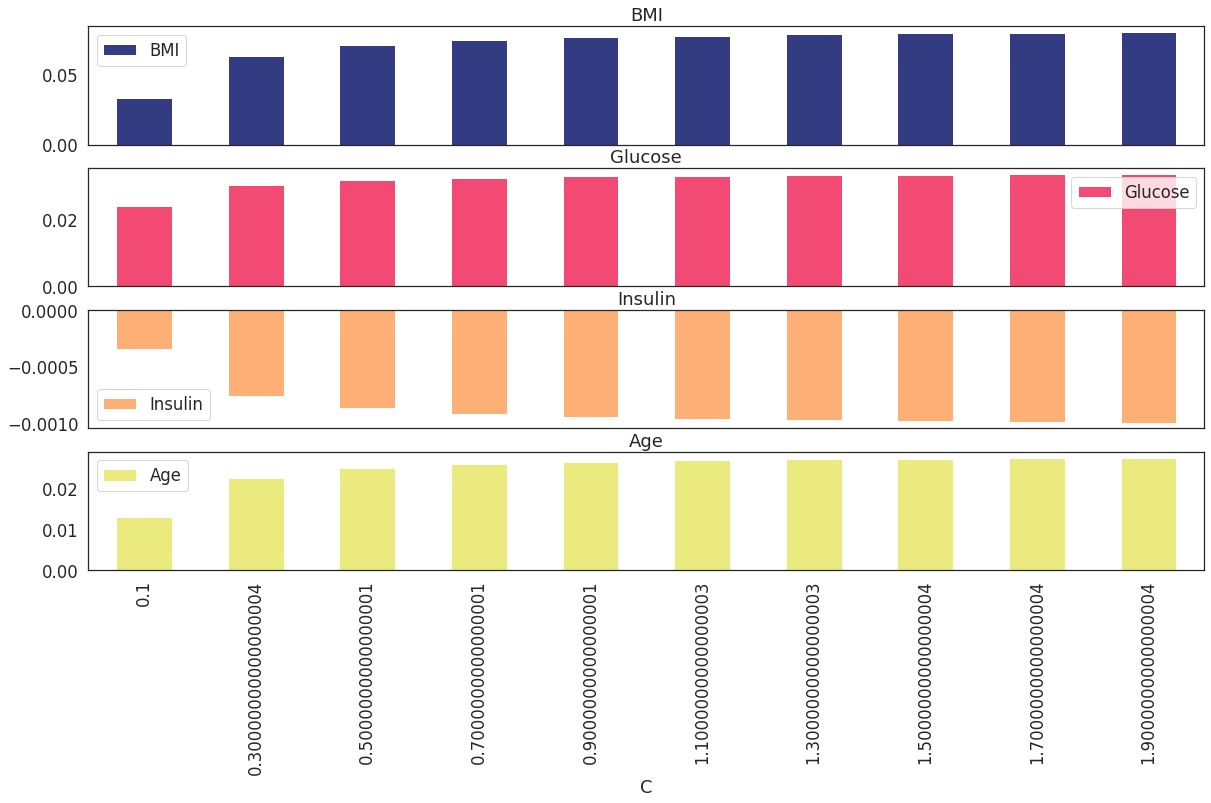

In [19]:
c_values = np.arange(0.1,2,0.2)
df_coefs = pd.DataFrame(columns = ["C","BMI","Glucose","Insulin", "Age"]) # df for results
for i in c_values:
  model = LogisticRegression(penalty='l1',solver='liblinear', random_state=0,C=i).fit(features,label)
# predictions
  coefs = model.coef_ [0]
  new_row = {"C":i,"BMI":coefs[0],"Glucose":coefs[1],"Insulin":coefs[2], "Age":coefs[3]}
  #append row to the dataframe:
  df_coefs = df_coefs.append(new_row, ignore_index=True)

# graph:
df_coefs.plot(subplots = True,x="C", y=["BMI","Glucose","Insulin", "Age"], kind="bar",figsize=(20,10))

My assumption was that with L1 regularization when we increase C the slopes will be close to zero as we saw in the class. I dont knoe to explain why here they become costant.

**The goodnest of fit** is with negative correlation with the strength of the penalty. The result will be a reduction in the error on the training set but an increase in the error on the test data. In other words, the stronger the regularization, the more we will avoid overfiting and therefore we will reduce the error of predicting new data. But, as a result, we will increase the error on the training data (the model will be less adapted to the training data)...